In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dfs = []

for i in range(78):
    filename = f'Train_data/Train{i}.csv'
    df = pd.read_csv(filename)
    dfs.append(df)

df_train = pd.concat(dfs, axis=0)

In [3]:
df_train

time  portPktIn  portPktOut  qSize  label
0            0        0.0         0.0      0      8
1            1        0.0         0.0      0      8
2            2  1223516.0   1223516.0      0      8
3            3  1250452.0   1250452.0      0      8
4            4  1249416.0   1249416.0      0      8
...        ...        ...         ...    ...    ...
124995  124995  1093759.0   1203381.0      0      5
124996  124996  1239089.0   1225621.0  13468      5
124997  124997  1133193.0   1146661.0      0      5
124998  124998   655266.0    655266.0      0      5
124999  124999   475206.0    475206.0      0      5

[9658000 rows x 5 columns]

In [4]:
#find missing data in the dataset
df_train.isnull().sum()

time          0
portPktIn     0
portPktOut    0
qSize         0
label         0
dtype: int64

In [5]:
sample=pd.read_csv('SampleSubmission.csv')

In [6]:
sample

ID  Target
0              test0_0       0
1              test0_1       0
2              test0_2       0
3              test0_3       0
4              test0_4       0
...                ...     ...
2337995  test18_144995       0
2337996  test18_144996       0
2337997  test18_144997       0
2337998  test18_144998       0
2337999  test18_144999       0

[2338000 rows x 2 columns]

In [7]:
df_test0= pd.read_csv('Test_data\Test0.csv')


In [8]:
df_test0

time  portPktIn  portPktOut  qSize
0            0        0.0         0.0      0
1            1   371264.0    371264.0      0
2            2        0.0         0.0      0
3            3   265216.0    265216.0      0
4            4  1167329.0   1167329.0      0
...        ...        ...         ...    ...
128995  128995   967479.0    956083.0  11396
128996  128996  1249434.0   1249434.0  11396
128997  128997  1182864.0   1153987.0  40273
128998  128998  1155450.0   1185363.0  10360
128999  128999  1045419.0   1055779.0      0

[129000 rows x 4 columns]

In [9]:
df_train.describe()

time     portPktIn    portPktOut         qSize         label
count  9.658000e+06  9.658000e+06  9.658000e+06  9.658000e+06  9.658000e+06
mean   6.267138e+04  9.388830e+05  9.388824e+05  8.597477e+04  5.581880e+00
std    3.704704e+04  4.891796e+05  4.864694e+05  3.822907e+05  3.444798e+00
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    3.095500e+04  6.870650e+05  6.895868e+05  0.000000e+00  3.000000e+00
50%    6.191000e+04  1.220794e+06  1.249196e+06  1.243200e+04  6.000000e+00
75%    9.286500e+04  1.250452e+06  1.249475e+06  5.698000e+04  9.000000e+00
max    1.489990e+05  2.832285e+06  1.250741e+06  9.214954e+06  1.100000e+01

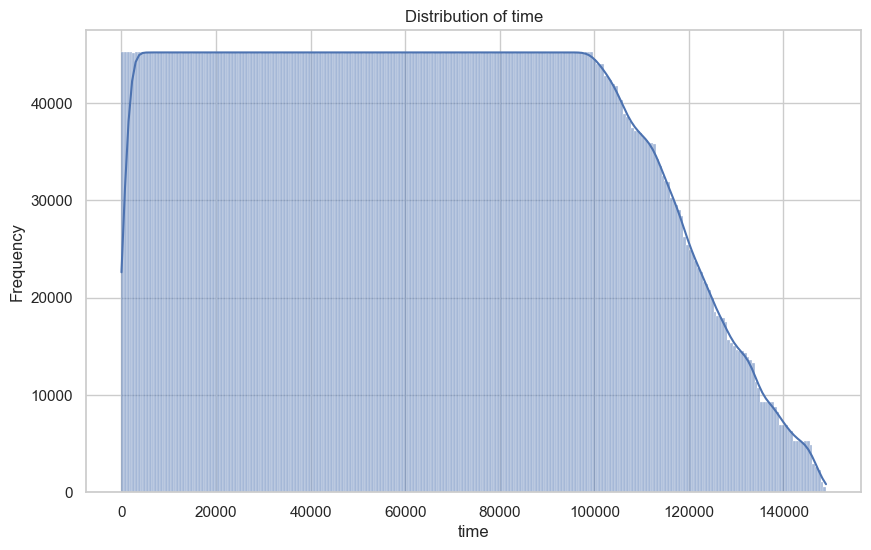

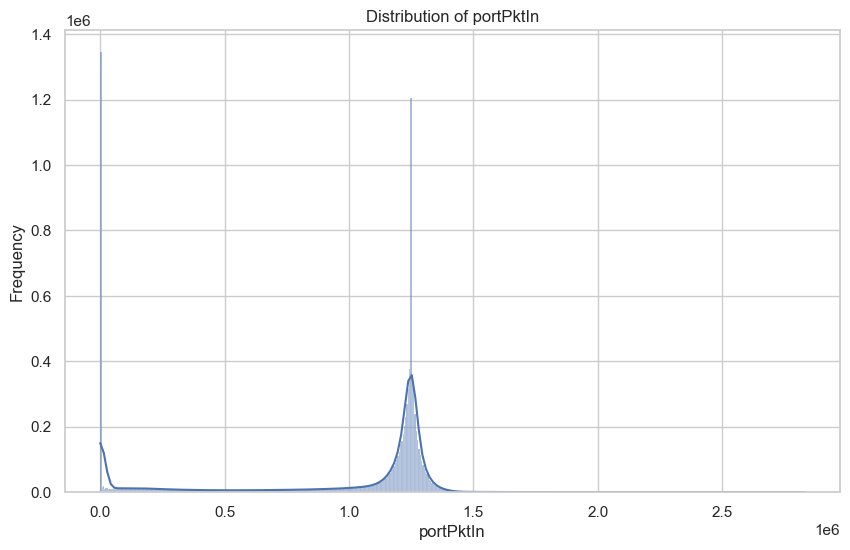

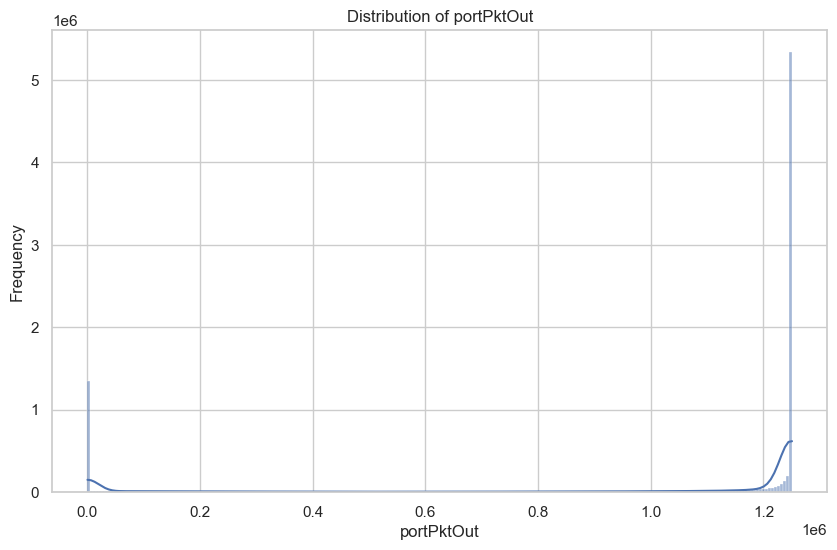

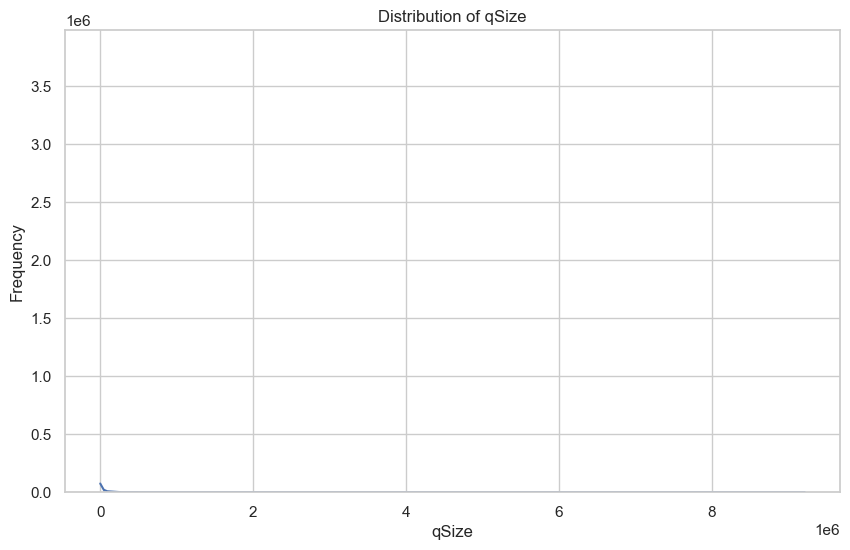

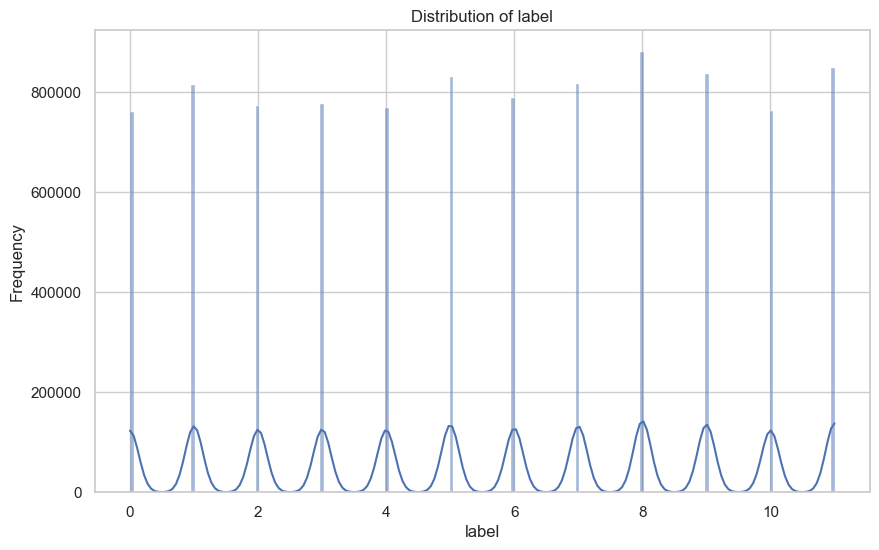

In [10]:
sns.set(style="whitegrid")

attributes=['time', 'portPktIn', 'portPktOut', 'qSize', 'label']

# Create histograms/density plots for each attribute
for attribute in attributes:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_train[attribute], kde=True)
    plt.title(f'Distribution of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.show()

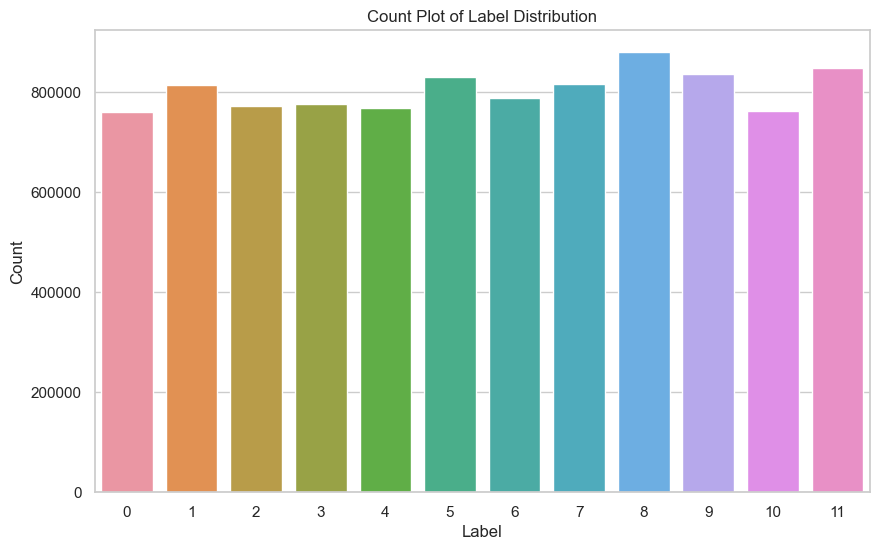

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='label')
plt.title('Count Plot of Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

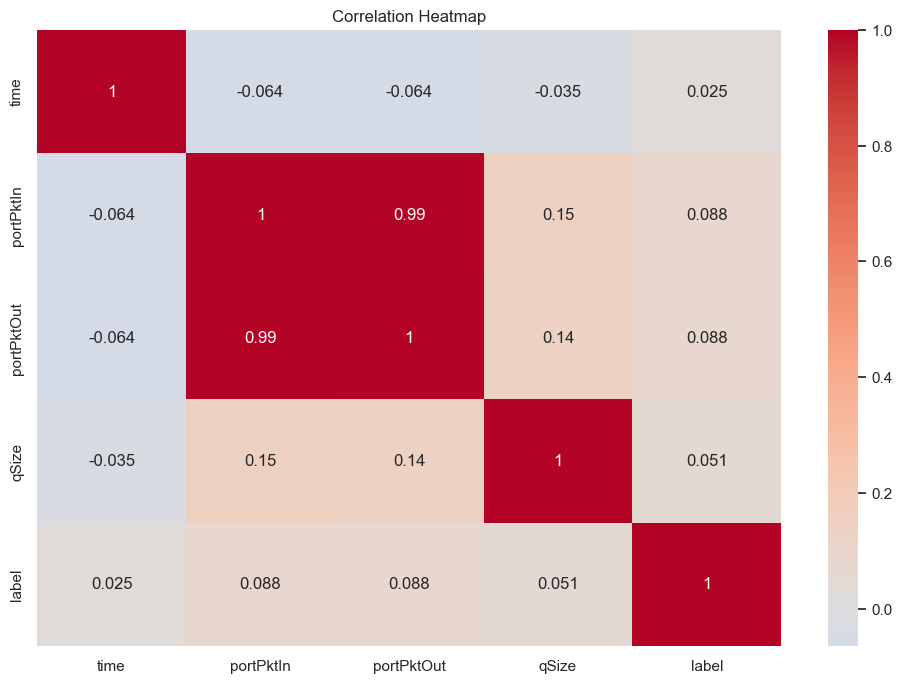

In [12]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

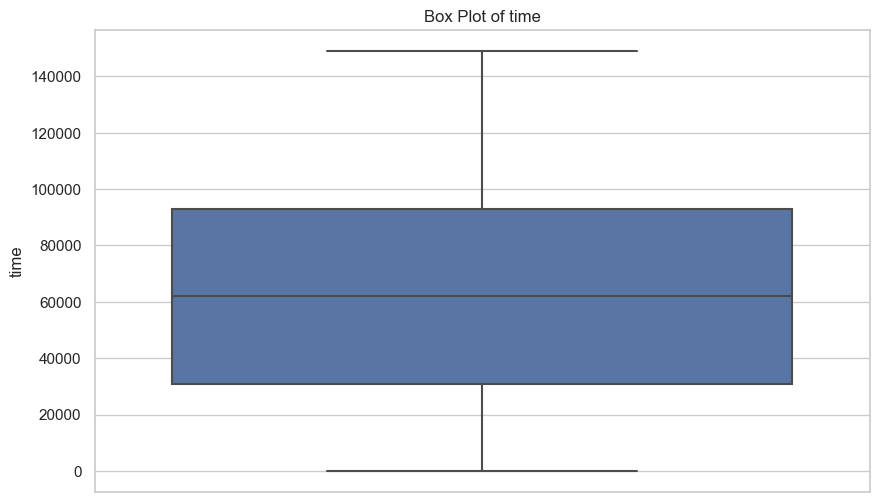

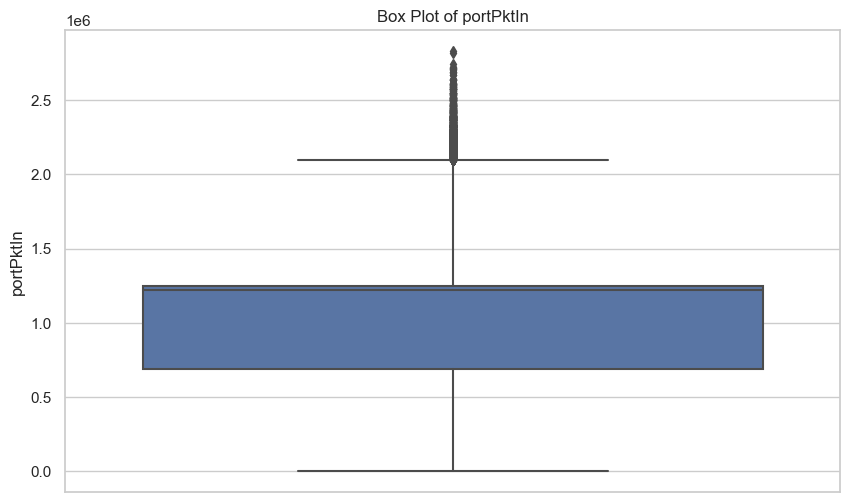

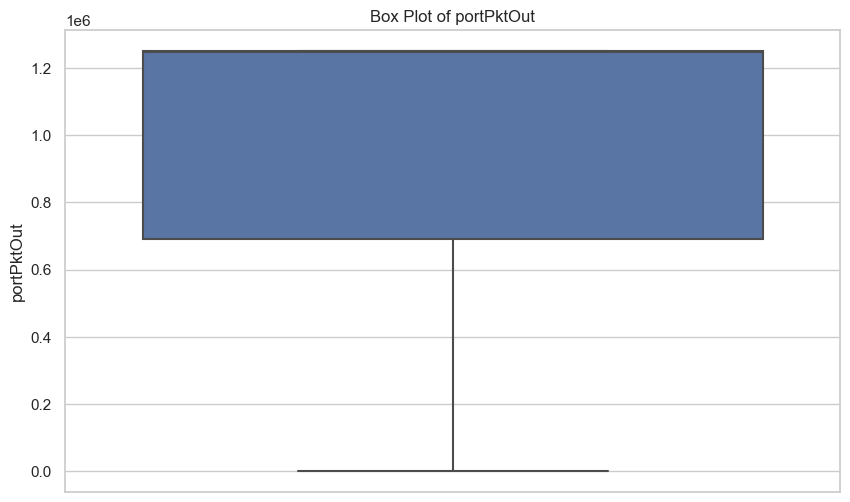

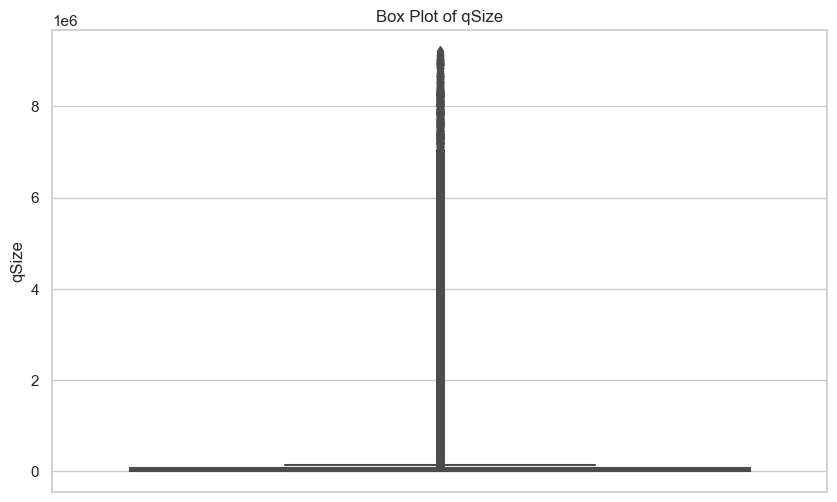

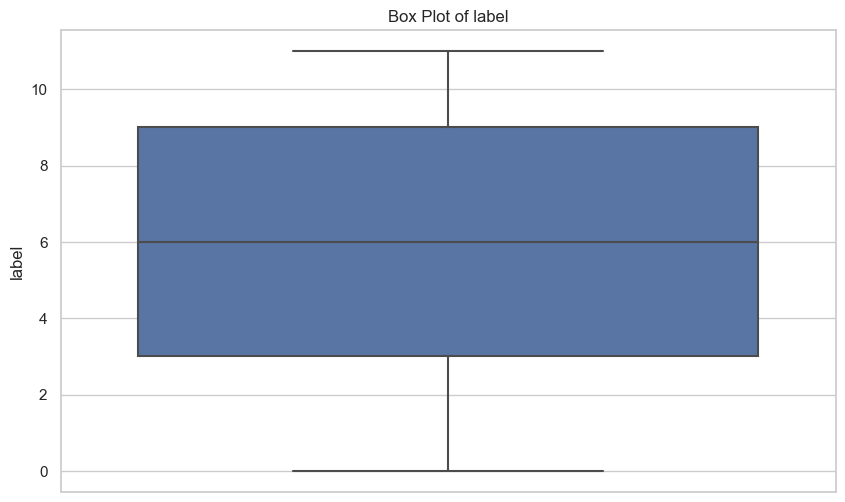

In [13]:

# Create box plots for each attribute
for attribute in attributes:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_train, y=attribute)
    plt.title(f'Box Plot of {attribute}')
    plt.ylabel(attribute)
    plt.show()

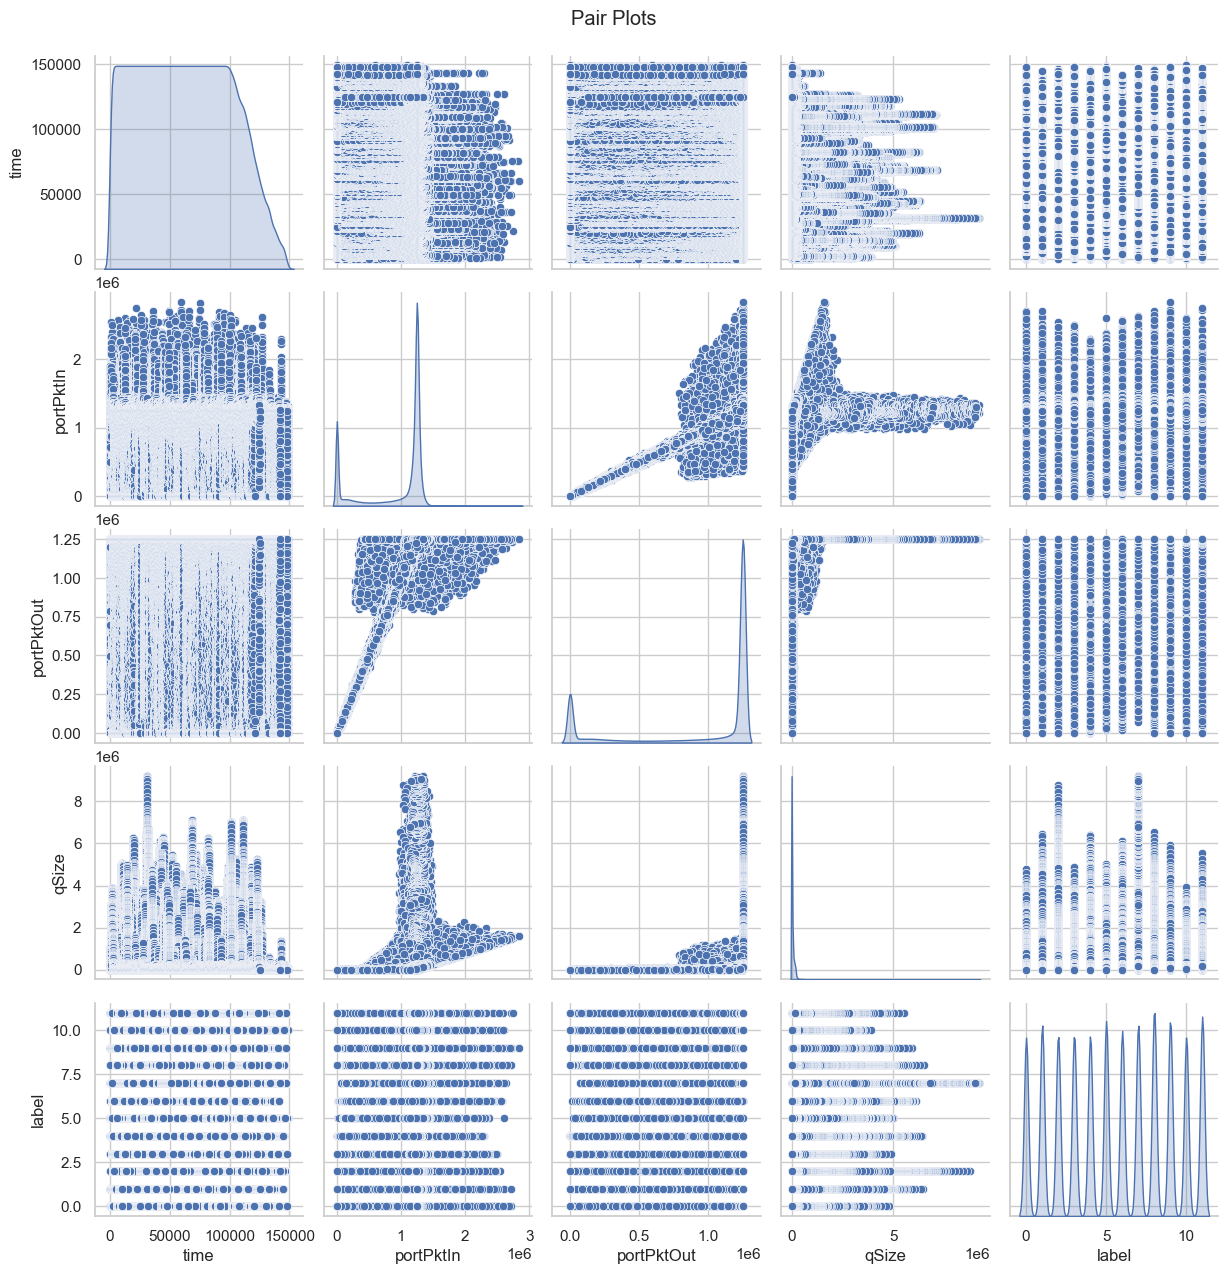

In [14]:
sns.pairplot(df_train, diag_kind='kde')
plt.suptitle('Pair Plots', y=1.02)
plt.show()

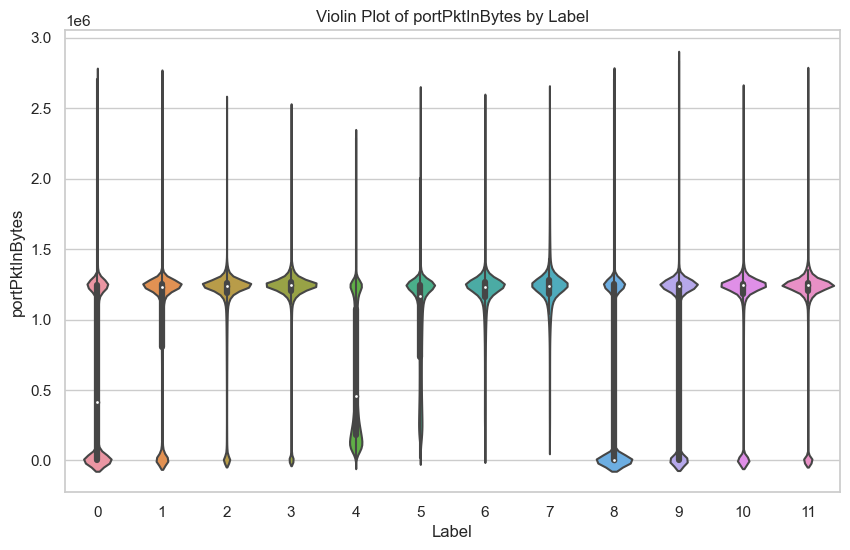

In [15]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_train, x='label', y='portPktIn')
plt.title('Violin Plot of portPktInBytes by Label')
plt.xlabel('Label')
plt.ylabel('portPktInBytes')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report

In [17]:
X = df_train.drop(columns=['time'])
y = df_train['label']

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model=DecisionTreeClassifier(max_depth=300)
model.fit(X_train,y_train)
y_pred=model.predict(X_val)
print("Training Accuracy:",accuracy_score(y_train, model.predict(X_train)))
print("Testing Accuracy:",accuracy_score(y_val, y_pred))
print("Classification Report:",classification_report(y_val, y_pred))


Training Accuracy: 1.0
Testing Accuracy: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    151998
           1       1.00      1.00      1.00    163189
           2       1.00      1.00      1.00    154595
           3       1.00      1.00      1.00    154688
           4       1.00      1.00      1.00    153970
           5       1.00      1.00      1.00    166343
           6       1.00      1.00      1.00    157613
           7       1.00      1.00      1.00    163355
           8       1.00      1.00      1.00    176459
           9       1.00      1.00      1.00    167413
          10       1.00      1.00      1.00    152237
          11       1.00      1.00      1.00    169740

    accuracy                           1.00   1931600
   macro avg       1.00      1.00      1.00   1931600
weighted avg       1.00      1.00      1.00   1931600



In [26]:
classes=len(y_train.unique())
classes

12

In [23]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)

[[151998      0      0      0      0      0      0      0      0      0
       0      0]
 [     0 163189      0      0      0      0      0      0      0      0
       0      0]
 [     0      0 154595      0      0      0      0      0      0      0
       0      0]
 [     0      0      0 154688      0      0      0      0      0      0
       0      0]
 [     0      0      0      0 153970      0      0      0      0      0
       0      0]
 [     0      0      0      0      0 166343      0      0      0      0
       0      0]
 [     0      0      0      0      0      0 157613      0      0      0
       0      0]
 [     0      0      0      0      0      0      0 163355      0      0
       0      0]
 [     0      0      0      0      0      0      0      0 176459      0
       0      0]
 [     0      0      0      0      0      0      0      0      0 167413
       0      0]
 [     0      0      0      0      0      0      0      0      0      0
  152237      0]
 [     0      0      

In [28]:
# Compute ROC curve and AUC for each class
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= classes

# Compute macro-average AUC
macro_auc = auc(all_fpr, mean_tpr)

# Plot ROC curves for each class
plt.figure()
for i in range(classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the macro-average ROC curve
plt.plot(all_fpr, mean_tpr, label=f'Macro-Average (AUC = {macro_auc:.2f})', linestyle='dashed')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend()
plt.show()


KeyError: 'key of type tuple not found and not a MultiIndex'